# Paris

This notebook illustrates the hierarchical clustering of graphs by the [Paris algorithm](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html).

In [1]:
from IPython.display import SVG

In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

In [5]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.hierarchy import Paris, BiParis, cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

**Loading**

In [6]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

**Clustering**

In [7]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)

**Visualization**

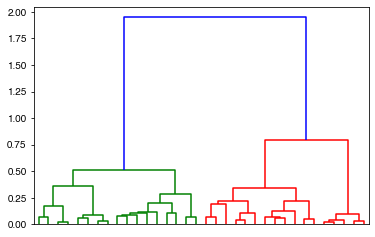

In [8]:
_ = show_dendrogram(dendrogram, no_labels=True)

**Cuts of the dendrogram**

In [9]:
labels = cut_straight(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
labels = cut_straight(dendrogram, n_clusters = 4)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 2 2 2 2 1 2 1 1]


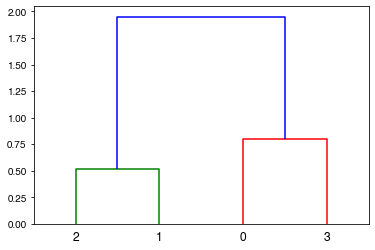

In [11]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters = 4, return_dendrogram=True)
_ = show_dendrogram(dendrogram_aggregate)

**Visualization**

In [12]:
image = svg_graph(adjacency, position, labels=labels)

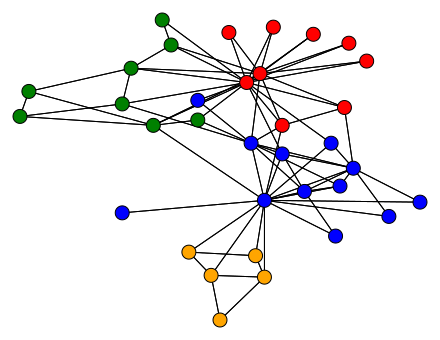

In [13]:
SVG(image)

**Metrics**

In [14]:
dasgupta_score(adjacency, dendrogram)

0.6666666666666667

In [15]:
tree_sampling_divergence(adjacency, dendrogram)

0.4873296566055281

## Digraphs

**Loading**

In [16]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

**Clustering**

In [17]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)

**Visualization**

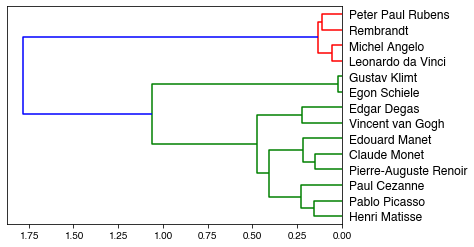

In [18]:
_ = show_dendrogram(dendrogram, labels = names, orientation = 'left')

**Cuts of the dendrogram**

In [19]:
# cut with 3 clusters
labels = cut_straight(dendrogram, n_clusters = 3)
print(labels)

[0 0 1 0 1 1 2 0 0 1 0 0 0 2]


**Visualization**

In [20]:
image = svg_digraph(adjacency, position, names=names, labels=labels)

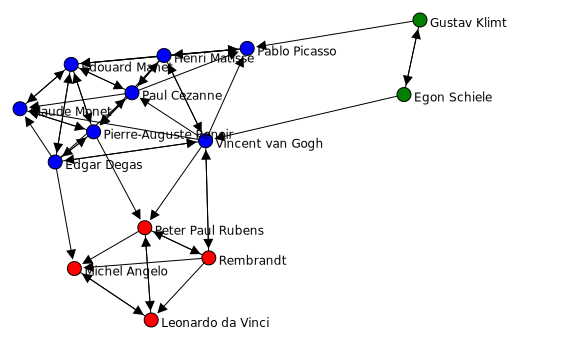

In [21]:
SVG(image)

**Metrics**

In [22]:
dasgupta_score(adjacency, dendrogram)

0.5842857142857143

In [23]:
tree_sampling_divergence(adjacency, dendrogram)

0.4685697020629489

## Bigraphs

**Loading**

In [24]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

**Clustering**

In [25]:
biparis = BiParis()
biparis.fit(biadjacency)
dendrogram_row = biparis.dendrogram_row_
dendrogram_col = biparis.dendrogram_col_
dendrogram_full = biparis.dendrogram_full_

**Visualization**

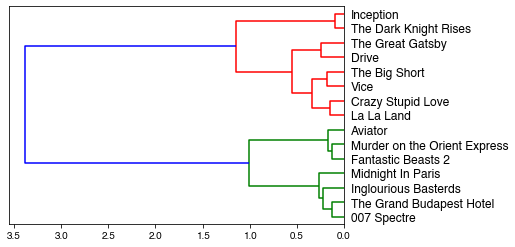

In [26]:
_ = show_dendrogram(dendrogram_row, labels = names_row, orientation = 'left')

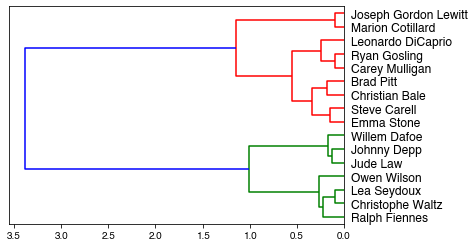

In [27]:
_ = show_dendrogram(dendrogram_col, labels = names_col, orientation = 'left')

**Cuts of the dendrogram**

In [28]:
labels = cut_straight(dendrogram_full, n_clusters = 4)
n_row = biadjacency.shape[0]
labels_row = labels[:n_row]
labels_col = labels[n_row:]

**Visualization**

In [29]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col)

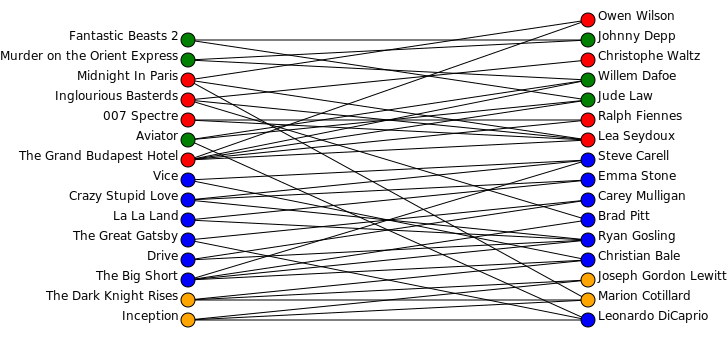

In [30]:
SVG(image)